In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from pathlib import Path

In [14]:
data_dir = Path(r'C:\Users\Firefly\Desktop\proteomics_breast_cancer\plsr')
label = pd.read_csv(Path(data_dir,'single_cell_soft_label.csv'), index_col = 0)
pb = pd.read_csv(Path(data_dir,'proteomics_cell_line.csv'),index_col =0)


In [15]:
pb

,0,1,2,3,4,5,6,7,8,9,...,7729,7730,7731,7732,7733,7734,7735,7736,7737,7738
T-47D,0.036811,0.995732,0.011127,0.483998,0.003821,0.999956,0.001392,0.264176,0.096700,0.430183,...,0.997328,0.028183,0.016047,0.797400,0.060291,0.314674,0.005491,0.042069,0.014690,0.972247
BT-474,0.029763,0.013145,0.017685,0.941258,0.273818,0.632279,0.108418,0.006595,0.000091,0.999820,...,0.664968,0.342007,0.020435,0.986528,0.196936,0.597905,0.146196,0.010592,0.056214,0.860441
MDA-MB-468,0.060581,0.156963,0.529851,0.367760,0.487528,0.001993,0.929472,0.012844,0.353083,0.012537,...,0.160495,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410
MDA-MB-231,0.966454,0.460612,0.999375,0.002524,0.571903,0.407524,0.900419,0.700940,0.990644,0.549580,...,0.480053,0.536598,0.130572,0.579570,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412
SUM159,0.636429,0.705898,0.549611,0.401875,0.994624,0.581299,0.711500,0.554440,0.803748,0.426849,...,0.200951,0.322879,0.945769,0.014352,0.421484,0.699678,0.901895,0.907640,0.887146,0.035728
MCF-10A,0.886769,0.566772,0.215657,0.698013,0.524180,0.375229,0.329606,0.975716,0.558802,0.398295,...,0.057207,0.434176,0.680860,0.022020,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594


In [18]:
line = [x[:-5] for x in label.exp_stage]
label.exp_stage = line
label

,exp_stage,Blinking-L,Waving,Noisy,Blinking-S
0,MCF10A,0.039905,0.056017,0.550434,0.353644
1,MCF10A,0.097600,0.027733,0.255690,0.618978
2,MCF10A,0.074517,0.057979,0.445817,0.421687
3,MCF10A,0.064100,0.304306,0.526767,0.104827
4,MCF10A,0.066667,0.160580,0.585065,0.187688
...,...,...,...,...,...
2187,Hs578t,0.057778,0.853637,0.083402,0.005183
2188,Hs578t,0.043496,0.069468,0.583729,0.303307
2189,Hs578t,0.106581,0.634742,0.187065,0.071613
2190,Hs578t,0.020987,0.048087,0.818469,0.112457


In [22]:
lines = ['MCF10A','SUM159','231','468','BT474','T47D']
df = label.loc[label['exp_stage'].isin(lines)]
df

,exp_stage,Blinking-L,Waving,Noisy,Blinking-S
0,MCF10A,0.039905,0.056017,0.550434,0.353644
1,MCF10A,0.097600,0.027733,0.255690,0.618978
2,MCF10A,0.074517,0.057979,0.445817,0.421687
3,MCF10A,0.064100,0.304306,0.526767,0.104827
4,MCF10A,0.066667,0.160580,0.585065,0.187688
...,...,...,...,...,...
2116,231,0.128838,0.154335,0.467003,0.249823
2117,231,0.087066,0.063915,0.363688,0.485332
2118,231,0.127955,0.094910,0.460096,0.317038
2119,231,0.127848,0.133158,0.327144,0.411849


In [25]:
pb.index = ['T47D','BT474','468','231','SUM159','MCF10A']
pb['line'] = pb.index
pb

,0,1,2,3,4,5,6,7,8,9,...,7730,7731,7732,7733,7734,7735,7736,7737,7738,line
T47D,0.036811,0.995732,0.011127,0.483998,0.003821,0.999956,0.001392,0.264176,0.096700,0.430183,...,0.028183,0.016047,0.797400,0.060291,0.314674,0.005491,0.042069,0.014690,0.972247,T47D
BT474,0.029763,0.013145,0.017685,0.941258,0.273818,0.632279,0.108418,0.006595,0.000091,0.999820,...,0.342007,0.020435,0.986528,0.196936,0.597905,0.146196,0.010592,0.056214,0.860441,BT474
468,0.060581,0.156963,0.529851,0.367760,0.487528,0.001993,0.929472,0.012844,0.353083,0.012537,...,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410,468
231,0.966454,0.460612,0.999375,0.002524,0.571903,0.407524,0.900419,0.700940,0.990644,0.549580,...,0.536598,0.130572,0.579570,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412,231
SUM159,0.636429,0.705898,0.549611,0.401875,0.994624,0.581299,0.711500,0.554440,0.803748,0.426849,...,0.322879,0.945769,0.014352,0.421484,0.699678,0.901895,0.907640,0.887146,0.035728,SUM159
MCF10A,0.886769,0.566772,0.215657,0.698013,0.524180,0.375229,0.329606,0.975716,0.558802,0.398295,...,0.434176,0.680860,0.022020,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A


In [26]:
result = df.merge(pb,how='left', left_on='exp_stage', right_on='line')
result

,exp_stage,Blinking-L,Waving,Noisy,Blinking-S,proteomics,0,1,2,3,...,7730,7731,7732,7733,7734,7735,7736,7737,7738,line
0,MCF10A,0.039905,0.056017,0.550434,0.353644,0,0.886769,0.566772,0.215657,0.698013,...,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A
1,MCF10A,0.097600,0.027733,0.255690,0.618978,0,0.886769,0.566772,0.215657,0.698013,...,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A
2,MCF10A,0.074517,0.057979,0.445817,0.421687,0,0.886769,0.566772,0.215657,0.698013,...,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A
3,MCF10A,0.064100,0.304306,0.526767,0.104827,0,0.886769,0.566772,0.215657,0.698013,...,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A
4,MCF10A,0.066667,0.160580,0.585065,0.187688,0,0.886769,0.566772,0.215657,0.698013,...,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594,MCF10A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,231,0.128838,0.154335,0.467003,0.249823,0,0.966454,0.460612,0.999375,0.002524,...,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412,231
1879,231,0.087066,0.063915,0.363688,0.485332,0,0.966454,0.460612,0.999375,0.002524,...,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412,231
1880,231,0.127955,0.094910,0.460096,0.317038,0,0.966454,0.460612,0.999375,0.002524,...,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412,231
1881,231,0.127848,0.133158,0.327144,0.411849,0,0.966454,0.460612,0.999375,0.002524,...,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412,231


In [28]:
result = result.drop(columns=['proteomics', 'line'])
result

,exp_stage,Blinking-L,Waving,Noisy,Blinking-S,0,1,2,3,4,...,7729,7730,7731,7732,7733,7734,7735,7736,7737,7738
0,MCF10A,0.039905,0.056017,0.550434,0.353644,0.886769,0.566772,0.215657,0.698013,0.524180,...,0.057207,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594
1,MCF10A,0.097600,0.027733,0.255690,0.618978,0.886769,0.566772,0.215657,0.698013,0.524180,...,0.057207,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594
2,MCF10A,0.074517,0.057979,0.445817,0.421687,0.886769,0.566772,0.215657,0.698013,0.524180,...,0.057207,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594
3,MCF10A,0.064100,0.304306,0.526767,0.104827,0.886769,0.566772,0.215657,0.698013,0.524180,...,0.057207,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594
4,MCF10A,0.066667,0.160580,0.585065,0.187688,0.886769,0.566772,0.215657,0.698013,0.524180,...,0.057207,0.434176,0.680860,0.02202,0.998394,0.952423,0.893719,0.959756,0.964417,0.005594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,231,0.128838,0.154335,0.467003,0.249823,0.966454,0.460612,0.999375,0.002524,0.571903,...,0.480053,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412
1879,231,0.087066,0.063915,0.363688,0.485332,0.966454,0.460612,0.999375,0.002524,0.571903,...,0.480053,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412
1880,231,0.127955,0.094910,0.460096,0.317038,0.966454,0.460612,0.999375,0.002524,0.571903,...,0.480053,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412
1881,231,0.127848,0.133158,0.327144,0.411849,0.966454,0.460612,0.999375,0.002524,0.571903,...,0.480053,0.536598,0.130572,0.57957,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412


In [36]:
from sklearn.utils import shuffle
df_shuffle = shuffle(result)
df_shuffle.reset_index(drop=True,inplace = True)
df_shuffle

,exp_stage,Blinking-L,Waving,Noisy,Blinking-S,0,1,2,3,4,...,7729,7730,7731,7732,7733,7734,7735,7736,7737,7738
0,468,0.212741,0.058660,0.182429,0.546170,0.060581,0.156963,0.529851,0.367760,0.487528,...,0.160495,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410
1,468,0.827113,0.054225,0.035222,0.083441,0.060581,0.156963,0.529851,0.367760,0.487528,...,0.160495,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410
2,231,0.074858,0.090508,0.452426,0.382207,0.966454,0.460612,0.999375,0.002524,0.571903,...,0.480053,0.536598,0.130572,0.579570,0.023737,0.006077,0.120535,0.053913,0.015474,0.482412
3,T47D,0.086523,0.097154,0.281764,0.534559,0.036811,0.995732,0.011127,0.483998,0.003821,...,0.997328,0.028183,0.016047,0.797400,0.060291,0.314674,0.005491,0.042069,0.014690,0.972247
4,468,0.390791,0.160280,0.161172,0.287757,0.060581,0.156963,0.529851,0.367760,0.487528,...,0.160495,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,BT474,0.037276,0.123128,0.680319,0.159278,0.029763,0.013145,0.017685,0.941258,0.273818,...,0.664968,0.342007,0.020435,0.986528,0.196936,0.597905,0.146196,0.010592,0.056214,0.860441
1879,SUM159,0.095192,0.774091,0.116964,0.013752,0.636429,0.705898,0.549611,0.401875,0.994624,...,0.200951,0.322879,0.945769,0.014352,0.421484,0.699678,0.901895,0.907640,0.887146,0.035728
1880,BT474,0.018728,0.038550,0.445596,0.497127,0.029763,0.013145,0.017685,0.941258,0.273818,...,0.664968,0.342007,0.020435,0.986528,0.196936,0.597905,0.146196,0.010592,0.056214,0.860441
1881,468,0.543358,0.072887,0.059874,0.323881,0.060581,0.156963,0.529851,0.367760,0.487528,...,0.160495,0.988250,0.888781,0.604213,0.176739,0.106769,0.358190,0.046964,0.351182,0.361410


In [37]:
X = df_shuffle.iloc[:,5:]
y = df_shuffle.iloc[:,1:5]

In [42]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    #rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [44]:
# test components
r2s = []
mses = []
#rpds = []
xticks = np.arange(1, 11)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    #rpds.append(rpd)

In [45]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

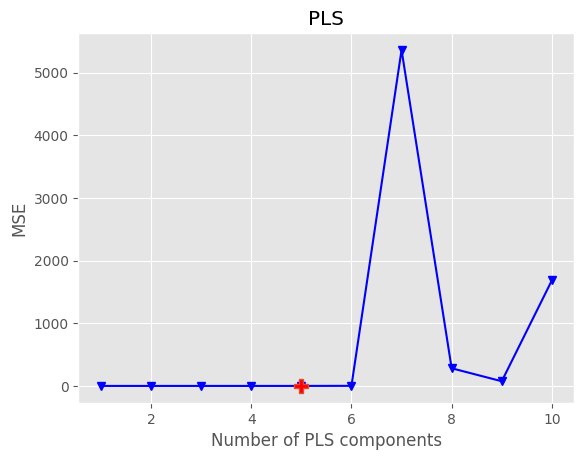

In [46]:
plot_metrics(mses, 'MSE', 'min')

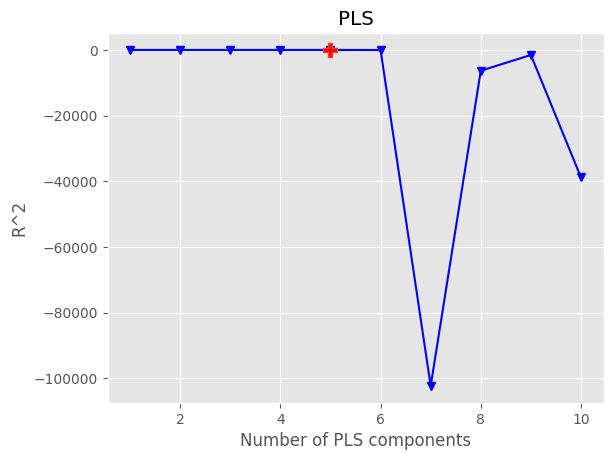

In [52]:
plot_metrics(r2s, 'R^2', 'max')

In [54]:
r2s
mses

[0.043658909376312914,
 0.042473943622325316,
 0.042388638779688355,
 0.04234267160500857,
 0.04221571165901852,
 1.4051400641293448,
 5363.591008240779,
 281.9267520695124,
 74.5160376783714,
 1684.5340953109167]

In [56]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)

mean_squared_error(y_test, pls.predict(X_test))
r2 = r2_score(y_test, pls.predict(X_test))

In [57]:
r2

0.1295760740391138